In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn

In [198]:
streams2019=pd.read_csv('/streams_2019-01-01__2020-01-01.txt',sep=',', header=0)
streams2019.head()

,Position,Track Name,Artist,Streams,URL,date,region,track_id
0,1,"thank u, next",Ariana Grande,3978028,https://open.spotify.com/track/2rPE9A1vEgShuZx...,2019-01-01,Global,2rPE9A1vEgShuZxxzR2tZH
1,2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,3883836,https://open.spotify.com/track/3KkXRkHbMCARz0a...,2019-01-01,Global,3KkXRkHbMCARz0aVfEt68P
2,3,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,3351784,https://open.spotify.com/track/4w8niZpiMy6qz1m...,2019-01-01,Global,4w8niZpiMy6qz1mntFA5uM
3,4,Wow.,Post Malone,3195966,https://open.spotify.com/track/6MWtB6iiXyIwun0...,2019-01-01,Global,6MWtB6iiXyIwun0YzU6DFP
4,5,MIA (feat. Drake),Bad Bunny,2777884,https://open.spotify.com/track/116H0KvKr2Zl4RP...,2019-01-01,Global,116H0KvKr2Zl4RPuVBruDO


In [199]:
print(streams2019.shape)

(73000, 8)


In [202]:
#table with max streams in 2019 for each track id
max_streams=streams2019.groupby('track_id')['Streams'].max().to_frame('max streams').reset_index()
max_streams.head()

,track_id,max streams
0,00ko9WaS4jOX1kEk3gvHjf,1486284
1,00v5O7qsglyTtp2q1M9DZr,1155602
2,01DOm09B2AbiTARAbXVI6g,1287930
3,01GmGxOPy22EdAZGC0X6q1,812040
4,01Qb6dN5suQNu87VJ1mIpf,832509


In [204]:
song_features=pd.read_csv('/song_features_2019-01-01__2020-01-01.txt',sep=',', header=0)
song_features.head()

,track_id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,valence
0,2rPE9A1vEgShuZxxzR2tZH,0.647,0.1020,106.960,0.0658,0.2800,0.000000,0.724,1,207333,-5.642,1,0.435
1,3KkXRkHbMCARz0aVfEt68P,0.479,0.0703,89.911,0.0466,0.5560,0.000000,0.760,2,158040,-5.574,1,0.913
2,4w8niZpiMy6qz1mntFA5uM,0.801,0.0642,95.881,0.2280,0.1570,0.000005,0.842,8,212500,-4.167,0,0.617
3,6MWtB6iiXyIwun0YzU6DFP,0.539,0.1010,99.947,0.1780,0.1630,0.000002,0.833,11,149520,-7.399,0,0.385
4,116H0KvKr2Zl4RPuVBruDO,0.539,0.0990,97.062,0.0621,0.0141,0.000496,0.817,6,210368,-6.349,0,0.158


In [205]:
print(song_features.shape)

(1768, 13)


In [206]:
#Join of both tables
df=pd.merge(max_streams, song_features, on=["track_id"])
df.head()

,track_id,max streams,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,valence
0,00ko9WaS4jOX1kEk3gvHjf,1486284,0.509,0.0573,150.001,0.387,0.00157,0.0000,0.899,9,225924,-8.040,1,0.5990
1,00v5O7qsglyTtp2q1M9DZr,1155602,0.218,0.4640,175.844,0.038,0.63100,0.0668,0.249,8,196000,-13.676,0,0.0786
2,01DOm09B2AbiTARAbXVI6g,1287930,0.600,0.2740,127.933,0.118,0.03910,0.0000,0.958,9,181153,-6.996,0,0.6070
3,01GmGxOPy22EdAZGC0X6q1,812040,0.644,0.1010,85.283,0.363,0.80200,0.0000,0.657,5,299168,-5.698,0,0.5670
4,01Qb6dN5suQNu87VJ1mIpf,832509,0.575,0.1120,148.767,0.159,0.21800,0.0000,0.699,1,116240,-9.922,1,0.2340


In [207]:
print(df.shape)

(1768, 14)


In [239]:
#Table with all the parameters we want to analyse
variables=df[['energy','liveness','tempo','speechiness','acousticness','instrumentalness','danceability','key','duration_ms','loudness','mode','valence']]
print(variables.shape)

(1768, 12)


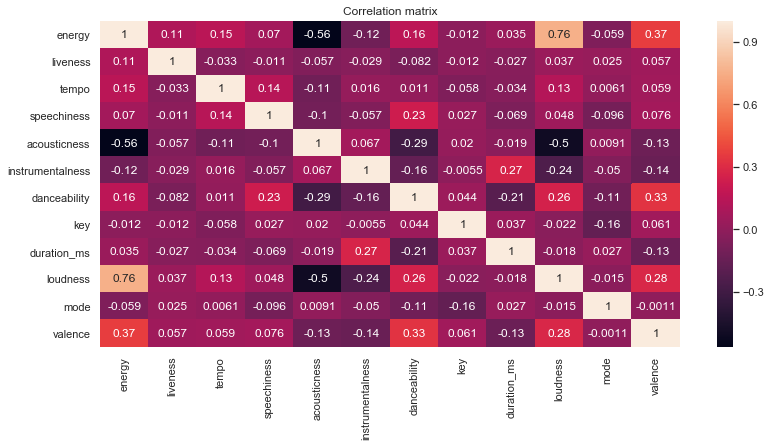

In [240]:
#Checking if the parameters are correlated
plt.figure(figsize = (13, 6))
corrMatrix = variables.corr(method ='pearson')
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation matrix')
plt.show()

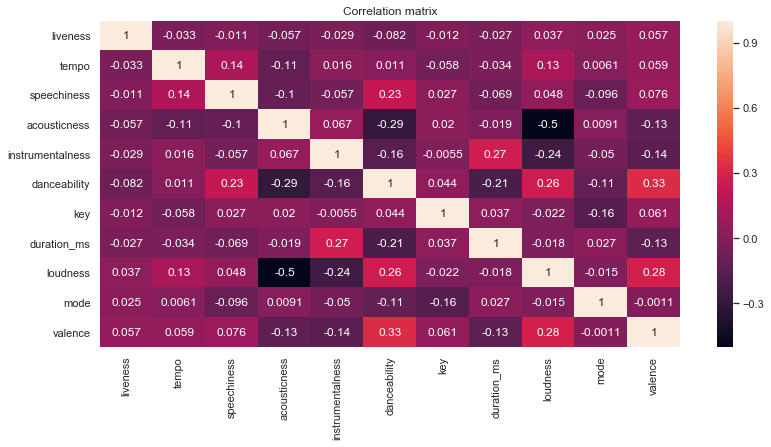

In [241]:
#Removing 'energy' to avoid multicolinearity
variables2=df[['liveness','tempo','speechiness','acousticness','instrumentalness','danceability','key','duration_ms','loudness','mode','valence']]
plt.figure(figsize = (13, 6))
corrMatrix = variables2.corr(method ='pearson')
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation matrix')
plt.show()

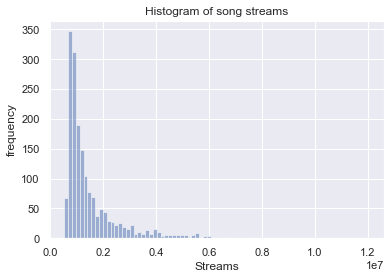

In [242]:
#Histogram of streams
streams=df['max streams']
plt.hist(streams,'auto',alpha=0.5)
plt.xlabel('Streams')
plt.ylabel('frequency')
plt.title('Histogram of song streams')
plt.grid(True)
plt.show()

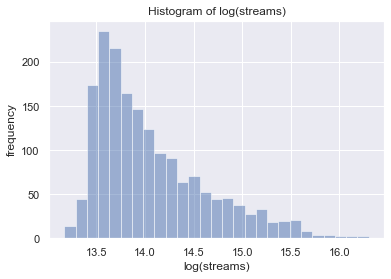

In [243]:
#Histogram of log(streams)
log_streams=np.log(streams)
plt.hist(log_streams,'auto',alpha=0.5)
plt.xlabel('log(streams)')
plt.ylabel('frequency')
plt.title('Histogram of log(streams)')
plt.grid(True)
plt.show()

In [212]:
#Regression with log scale to facilitate visualization
Y=log_streams
s=np.shape(Y)
const=np.ones(s)

live=df['liveness']
tempo=df['tempo']
speech=df['speechiness']
acoust=df['acousticness']
instr=df['instrumentalness']
dance=df['danceability']
key=df['key']
duration=df['duration_ms']
loud=df['loudness']
mode=df['mode']
valence=df['valence']
X=np.column_stack((const, live, tempo, speech, acoust, instr, dance, key, duration, loud, mode, valence))

model=sm.OLS(Y,X)
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Streams   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.499
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           7.33e-05
Time:                        23:05:15   Log-Likelihood:                -1500.7
No. Observations:                1768   AIC:                             3025.
Df Residuals:                    1756   BIC:                             3091.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2663      0.129    110.415      0.0

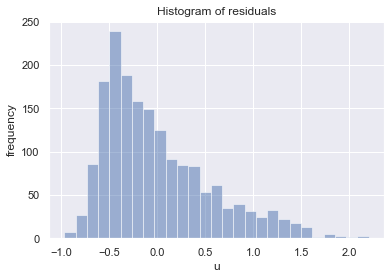

In [236]:
#Residuals
u=results.resid
plt.hist(u,'auto',alpha=0.5)
plt.xlabel('u')
plt.ylabel('frequency')
plt.title('Histogram of residuals')
plt.grid(True)
plt.show()

In [216]:
#Equation
beta=results.params
print(round(beta,2))

const    14.27
x1        0.06
x2       -0.00
x3       -0.41
x4        0.03
x5        0.08
x6       -0.17
x7       -0.01
x8       -0.00
x9       -0.01
x10       0.01
x11       0.11
dtype: float64


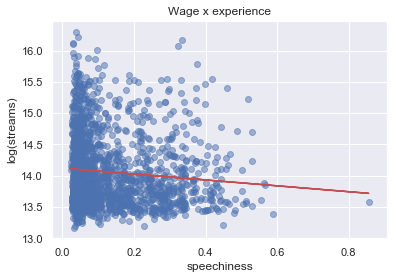

In [235]:
#Parameter that influences streams the most is x3 (speechiness)
x = speech
fig, ax = plt.subplots()
_ = ax.scatter(x, Y,alpha=0.5)
z = np.polyfit(x, Y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r")
plt.xlabel('speechiness')
plt.ylabel('log(streams)')
plt.title('Correlation speechiness x log(streams)')
plt.show()